In [3]:
import csv
import numpy as np
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import pandas as pd
import datetime as dt
import math


In [4]:
#Sort the data in the file
#read a file
# file = open('Fukadani201607to10row_UTF-8.txt')
file = open('Fukadani201607to201711.txt')

# file = codecs.open('Fukadani201607to10row.txt')
# file = open('Fukadani2016JuneJulyselected.txt')

Allfile = file.readlines()
file.close()
Allfilelisted = [0]*len(Allfile)

#split each list at blanks
for n in range(len(Allfile)):
    Allfilelisted[n] = Allfile[n].split()

#extract title
Data = Allfilelisted[1:]
Datatitle = Allfilelisted[0]


#date and time are located in different places so put them together
#datetime = date + time (datetime doesn't have a title)

datetime = [0]*(len(Data))
for n in range(len(Data)):
    datetime[n] = Data[n][0] + Data[n][1]
    
# #Delite date+time from Data  because "datetime" is not numbers 

Data1 = [0]*(len(Data))
for n in range(len(Data)):
    Data1[n] = Data[n][2:]

Data1title = Allfilelisted[0][1:]
# print(Data1title)

In [5]:
print(Data1title)
#Choose the data you wanna use

['RECORD', 'Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg', 'L_DR_Avg', 'L_DL_Avg', 'Load_Avg', 'Load_Avg_difference', 'WL_up_Avg', 'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']


In [6]:
#Start using pandas
#The reason I just started pandas is just because I haven't known about pandas until few minites ago haha

df = pd.DataFrame(Data1)
df.columns = Data1title

#Choose data we are gonna use
#YOU SHOULD CHANGE HERE IF YOU WANNA SELECT DIFFERENT INPUT DATA OR ADD SOME DATA AS INPUTS
# y_cols = ['Load_Avg_difference']
y_cols = ['Load_Avg_difference']
# # X_cols = ['WL_FMR_Avg', 'hp_Tot(3)']
# X_cols = ['Pit_WL_Avg', 'WL_up_Avg', 'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg',
# 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
# X_cols = ['WL_up_Avg', 'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg',
# 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
# X_cols = ['WL_FMR_Avg','vel_P_Tot','hp_Tot(6)','hp_Tot(5)']
# X_cols = ['vel_P_Tot','hp_Tot(6)','hp_Tot(5)']
# X_cols = ['WL_FMR_Avg','hp_Tot(6)','hp_Tot(5)']
X_cols = ['hp_Tot(6)','hp_Tot(5)', 'hp_Tot(3)', 'hp_Tot(10)', 'vel_P_Tot']
# X_cols = [ 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',  'WL_FMR_Avg','hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
# X_cols = [ 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg','hp_Tot(7)']


X = df[X_cols].values.astype('float')
y = df[y_cols].values.astype('float')
# #     X.rolling(window=5).mean()
#     y.rolling(window=5).mean()



['hp_Tot(6)', 'hp_Tot(5)', 'hp_Tot(3)', 'hp_Tot(10)', 'vel_P_Tot', 'Load_Avg_difference']


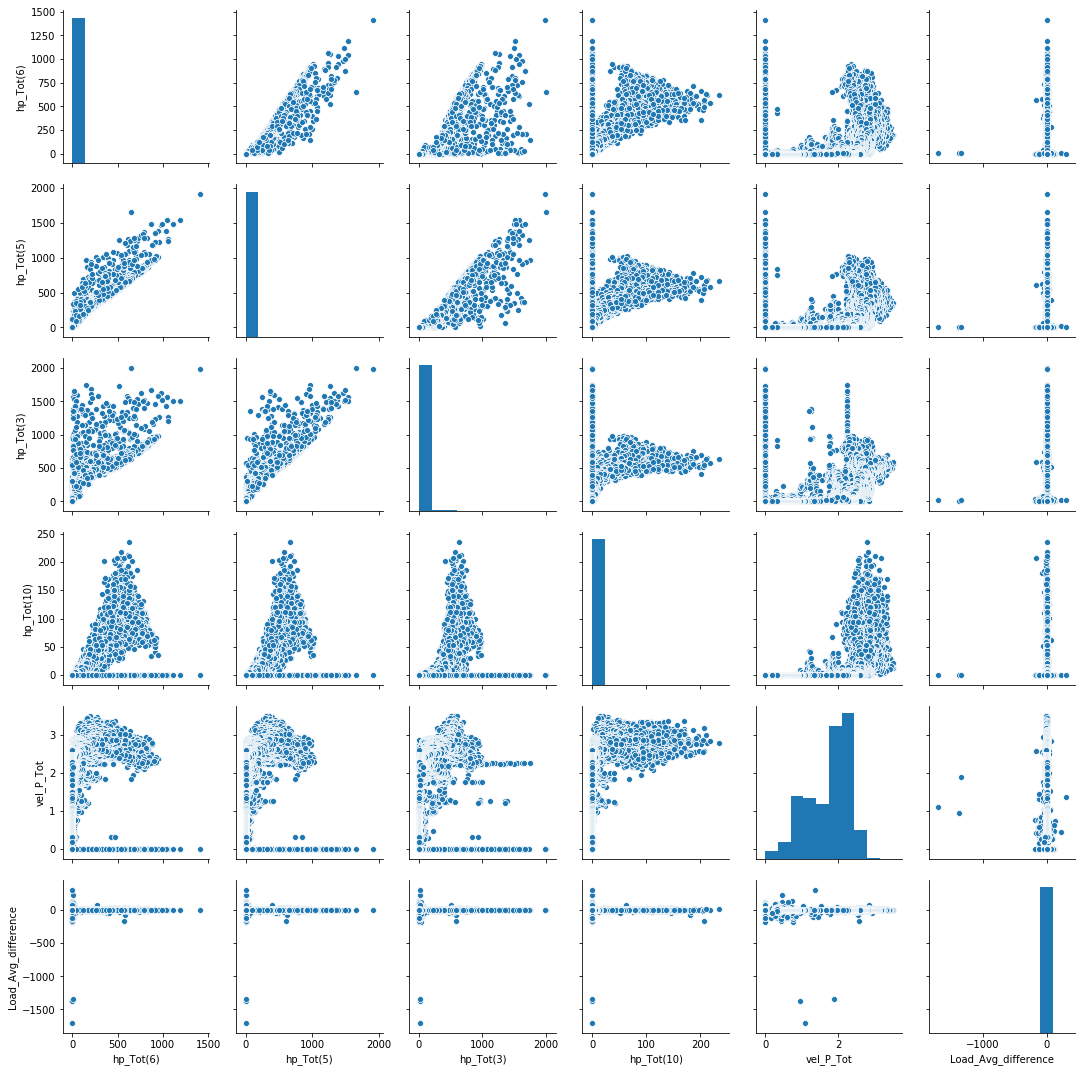

In [8]:
# 「散布図行列」を作成する。散布図行列を利用すれば、データセットの特徴量のペアに対す
# る相関関係を1 つの平面上で可視化可能
import matplotlib.pyplot as plt
import seaborn as sns
Xy_cols = X_cols + y_cols
print(Xy_cols)
df_f = df.astype('float')
sns.pairplot(df_f[Xy_cols],height=2.5)
plt.show()

In [47]:
a =　pd.concat([df1, df4], axis=1) df[X_cols]df[y_cols]
a

,Load_Avg_difference,hp_Tot(10),hp_Tot(3),hp_Tot(5),hp_Tot(6),vel_P_Tot
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# moving averages
df_copy = pd.DataFrame(Data1)
df_copy.columns = Data1title
mavgs = 30

df[X_cols] = df_copy[X_cols].rolling(window=mavgs).mean()
df[y_cols] = df_copy[y_cols].rolling(window=mavgs).mean()
# print(df[X_cols])
# print(df[y_cols])


In [11]:
df_new = df.dropna(how='any')

In [12]:
# print(df_new[746509:746609])

In [13]:
# #Delete data of when the pit gets cleared 
# df["RECORD"] = df["RECORD"].values.astype('float')
# indic = []
# for i in range(len(df)):
#     if df["RECORD"][i] == 0:
#         indic.append(i)
# # print(indic)
# indic.reverse()
# # print(indic)
# # df_new = df
# for i in range(len(indic)):
#     r =  range(indic[i]-101, indic[i]-1)
#     print(indic[i]-101)
#     print(indic[i]-1)
#     df_new = df_new.drop(r)

In [14]:
#Cut data where pit weigh < 1000?500?
df_new['Load_Avg'] = df_new['Load_Avg'].values.astype('float')
df_cut1 = df_new[(df_new['Load_Avg'] > 200)&(df_new['Load_Avg'] < 1300)]

# Cut data where pit load difference is out of margin of error
df_cut2 = df_cut1[(df_cut1['Load_Avg_difference'] < 20)&(df_cut1['Load_Avg_difference'] > -0.5)]

#Cut out NaN data
df_final = df_cut2.dropna(how='any')

C:\Users\yutak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


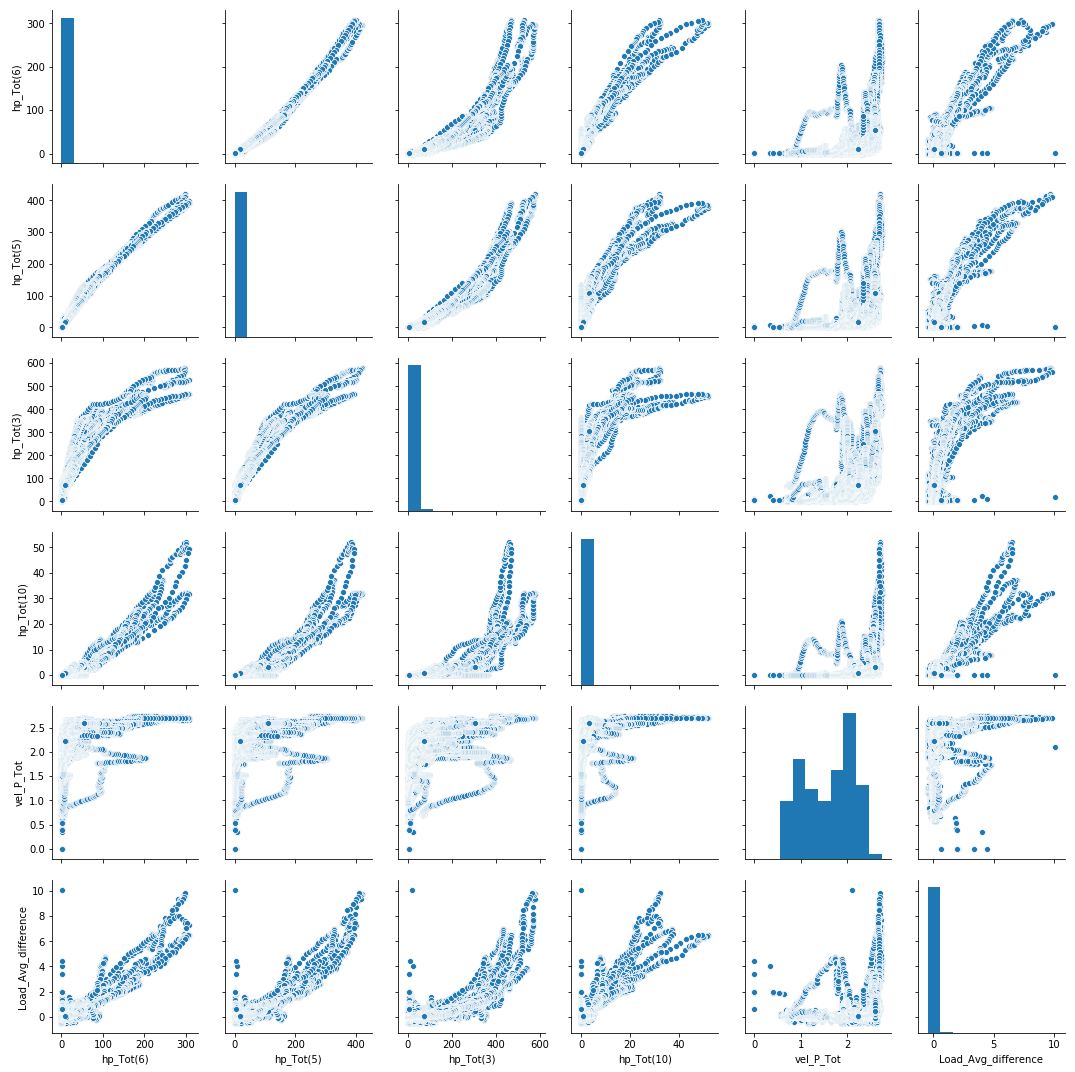

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_final[Xy_cols],height=2.5)
plt.show()

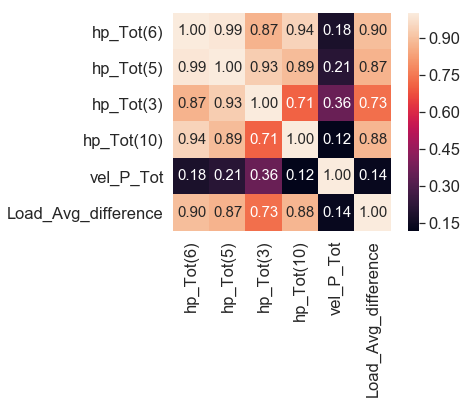

In [18]:
import numpy as np
#ピアソンの積率相関係数を計算
cm = np.corrcoef(df_final[Xy_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=Xy_cols,
                 xticklabels=Xy_cols)
plt.show()
                 

In [8]:
X = df_final[X_cols].values.astype('float')
y = df_final[y_cols].values.astype('float')

In [11]:
#Devide data into Training set and test set
#In Machine Learning course of coursera, I learned that I have to devide the data set into Training set, Cross calidation set,Test set.
#But in this case I'll just follow the code that I found online. Probably I'll have to fix this part once I get to know much more about Machine Learning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_ori_train = X_train
X_ori_test = X_test
y_ori_train = y_train
y_ori_test = y_test

In [12]:
# train the parameters with regression model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(100)
# n_estimators : integer, optional (default=10)
# The number of trees in the forest.

model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
#Score
#coefficient of determination R^2 

print(model.score(X_test,y_test))

0.9325448872465076


In [14]:
# #Score without the data where there's no events happning
#Delete data of when the pit gets cleared 

df_y_test = pd.DataFrame(y_test)
df_y_test.columns = y_cols
df_X_test = pd.DataFrame(X_test)
df_X_test.columns = X_cols

df_yX_test = pd.concat([df_y_test, df_X_test], axis=1)

df_yX_test_del = df_yX_test[(df_yX_test['Load_Avg_difference'] < 20)&(df_yX_test['Load_Avg_difference'] > 1)]
X_test_del = df_yX_test_del[X_cols].values.astype('float')
y_test_del = df_yX_test_del[y_cols].values.astype('float')


print("Score ,when y>1")
print(model.score(X_test_del,y_test_del))
print("The number of the data where y > 1 ", "is " ,len(y_test_del))

Score ,when y>1
0.951229352219071
The number of the data where y > 1  is  407


In [15]:
# y, X should be real data. X is gonna put into the model you made 
# and the model will give you the predictions. 
# This line graph shows how the predicitons match with the real data which is y.
# Second gragh zooms out the part where you chose from sta to end.
class Graph:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        

    def line_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)
        #flatten y_test to applay the data to a graph
        y_graph = self.y.flatten()
        #
        df_result = pd.DataFrame({"y_test":y_graph,"result":result})

        #
        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        # Draw graph
        df_result.plot(figsize=(15, 3))
        
        # Zoom out where you chose
        df_result[sta:end].plot(figsize=(15, 3))
        plt.show()
        
    def cumlate_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)

        p_res = np.cumsum(result)
        y_res = np.cumsum(self.y)

        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        df_p_x = pd.DataFrame({"original":y_res,"result":p_res})
        df_p_x.plot(figsize=(15, 3))
        df_p_x[sta:end].plot(figsize=(15, 3))
        plt.show()

        
    #Take a look at a distribution map between y and X
    def distribution_map(self, number = 0):
        import matplotlib.pyplot as plt
        # Notebook出力には次の１行が必要
        %matplotlib inline

        # # Plot the data you select
        plt.figure(figsize=(8, 6))

        plt.scatter(self.y, self.X[:,number])
        plt.show()

        
    


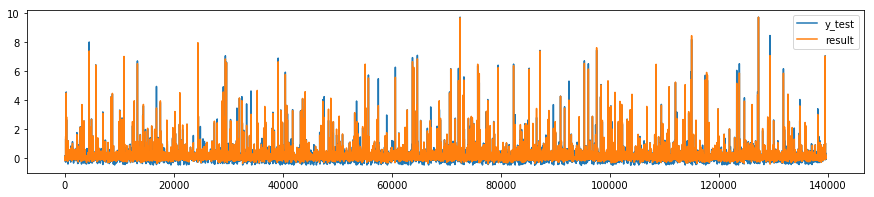

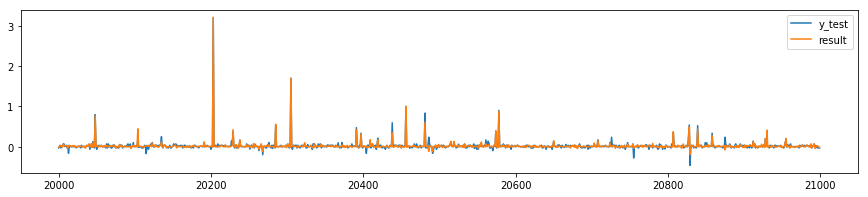

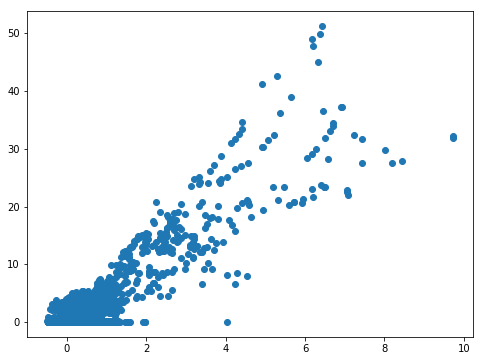

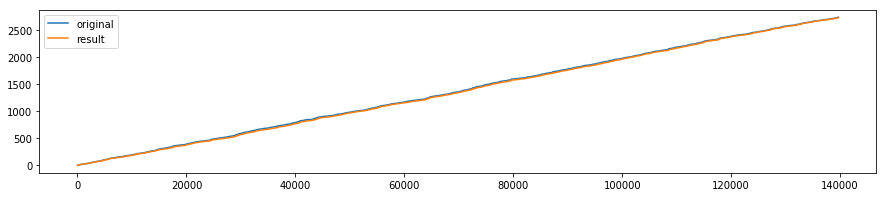

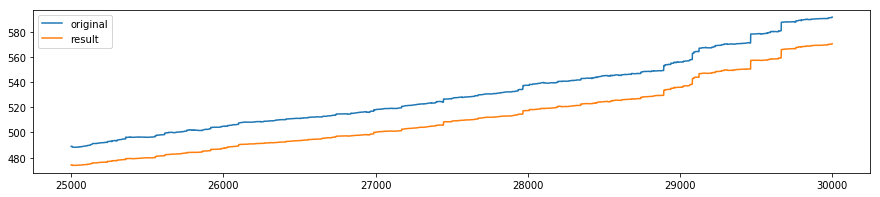

In [16]:
# Graphs of test data

yX_test = Graph(y_test,X_test)
yX_test.line_graph(20000,21000)
yX_test.distribution_map(3)
yX_test.cumlate_graph(25000,30000)

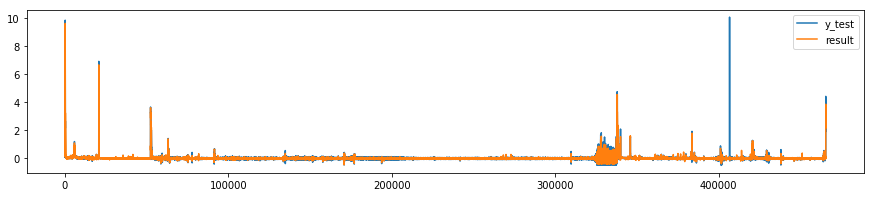

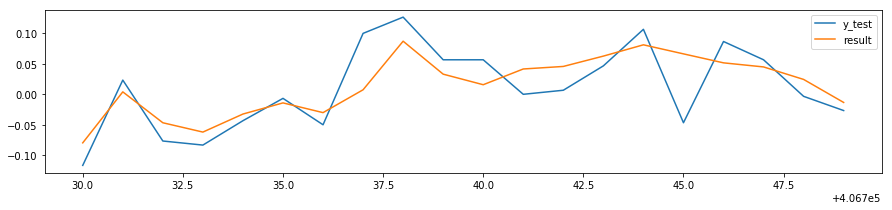

In [34]:
yX_all = Graph(y, X)
yX_all.line_graph(406730,406750)
# yX_all.cumlate_graph(90000,100000)
# for i in range(len(X_cols)):
#     yX_all.distribution_map(i)
#     print(X_cols[i])

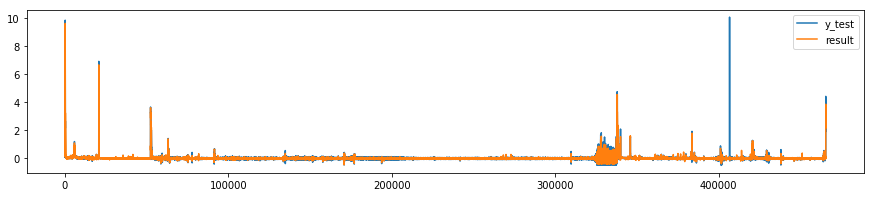

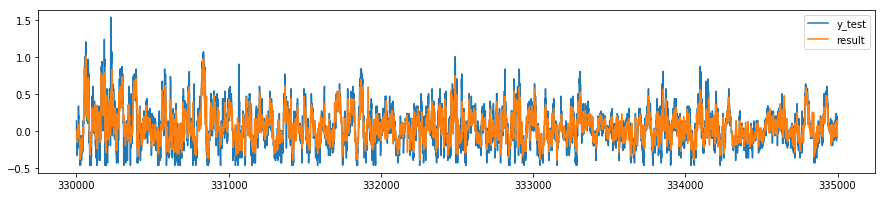

In [33]:
yX_all = Graph(y, X)
yX_all.line_graph(330000,335000)

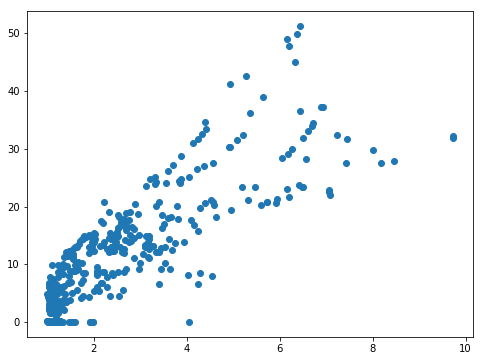

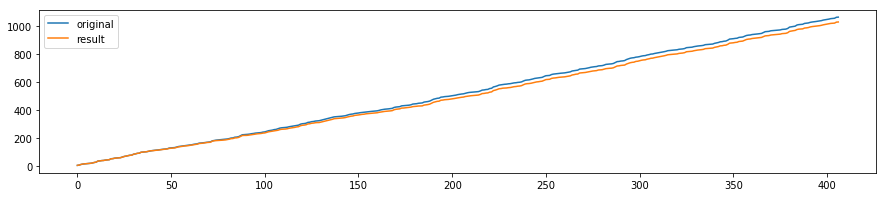

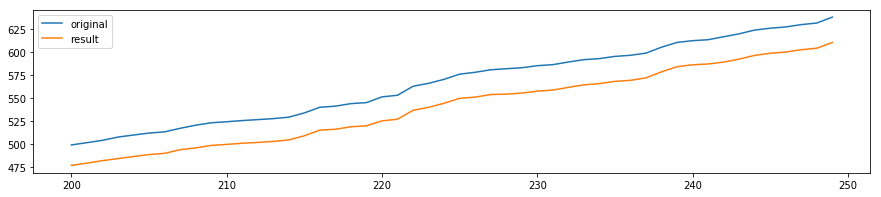

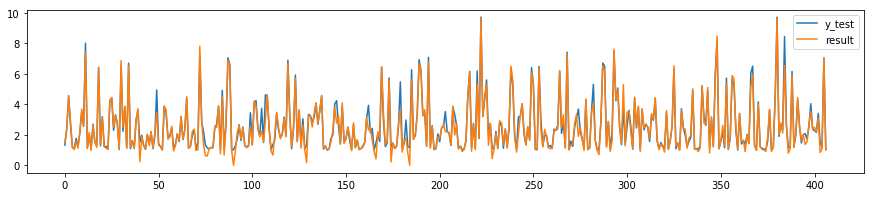

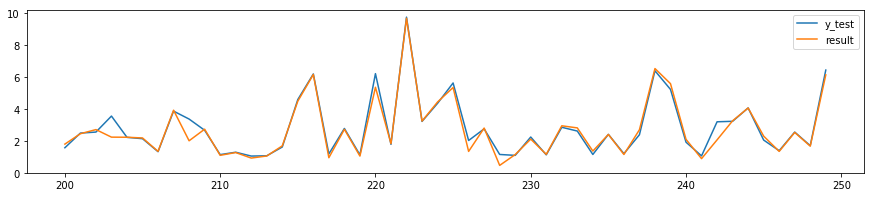

In [18]:
yX_test_del = Graph(y_test_del, X_test_del)
yX_test_del.distribution_map(3)
yX_test_del.cumlate_graph(200,250)
yX_test_del.line_graph(200,250)

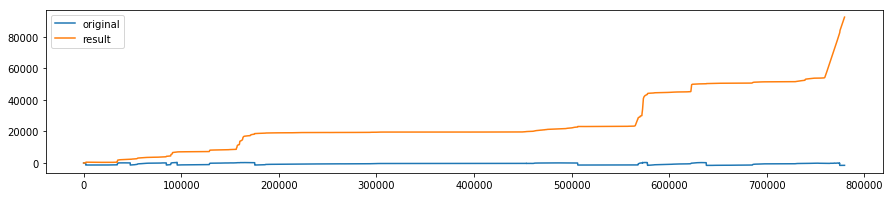

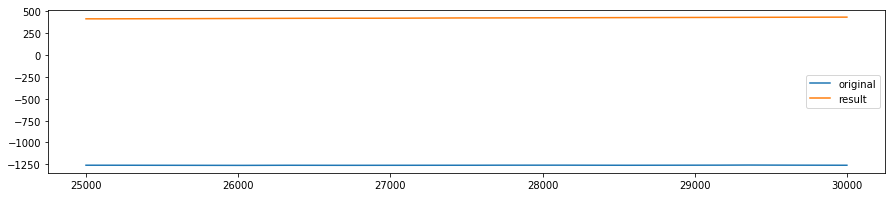

In [19]:
df_ori = df_new[(df_new['hp_Tot(6)'] > -10)&(df_new['hp_Tot(6)'] < 500)]

X_ori = df_ori[X_cols].values.astype('float')
y_ori = df_ori[y_cols].values.astype('float')


yX_ori = Graph(y_ori, X_ori)
yX_ori.cumlate_graph(25000,30000)


1   hp_Tot(5)   0.5119349882467543
2   hp_Tot(6)   0.24189546657518057
3   hp_Tot(3)   0.10955694541129647
4   vel_P_Tot   0.06935014444746568
5   hp_Tot(10)   0.06726245531930285


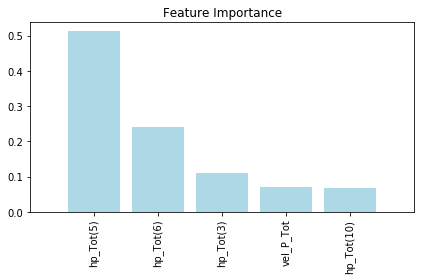

In [20]:
#
feature = model.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.loc[:, 'number']

#Name of the features
dfX = pd.DataFrame(X)
dfX.columns = X_cols
label = dfX.columns[0:]

#arrange the features in order of importance
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print( str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

          
import matplotlib
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [21]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *
# import graphviz

In [22]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *

# X_cols_np = np.array(X_cols)

# regr = tree.DecisionTreeRegressor(max_depth=10)
# regr.fit(X_train, y_train.ravel())

# viz = dtreeviz(regr,
#                X_train,
#                y_train.ravel(),
#                target_name="",
#                feature_names= X_cols_np
#               )

# #There's a UnicodeDecodeError problem if you try to visualize "viz",which is caused by the Japanese setting of this computer.
# #"viz.view()" works fine on Ubuntu in my Virtual machine.
# # viz.view()

In [23]:
# print(regr.score(X_test,y_test))